In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Hypothesis Testing

## How do we determine if an outcome is significant?

Statistical hypothesis tests are based a statement called the **null hypothesis** that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. 

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the **alternative hypothesis**: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. 

Once you have the null and alternative hypothesis, you choose a **significance level**. The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the **p-value**.

The **t-test** is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.

## One-Sample T-Test 

A one-sample t-test checks whether a sample mean differs from the population mean. In testing the null hypothesis that the population mean is equal to a specified value $\mu_0$, one uses the statistic

$$ t = \frac{\overline{x} - \mu_0}{s/\sqrt{n}} $$
where ${\overline {x}}$ is the sample mean, s is the sample standard deviation of the sample and n is the sample size.

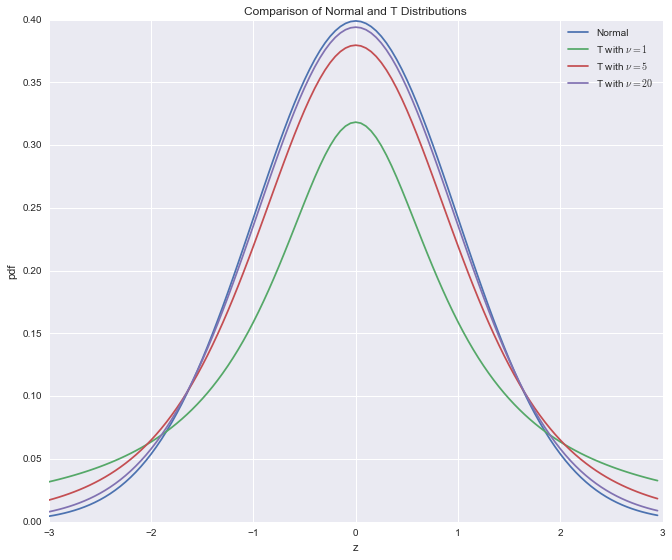

In [114]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

z = np.arange(-3,3,.05)
plt.plot(z, stats.norm.pdf(z), label="Normal")
plt.plot(z, stats.t.pdf(z, 1), label=r"T with $\nu=1$")
plt.plot(z, stats.t.pdf(z, 5), label=r"T with $\nu=5$")
plt.plot(z, stats.t.pdf(z, 20), label=r"T with $\nu=20$")
plt.xlabel("z")
plt.ylabel("pdf")
plt.title("Comparison of Normal and T Distributions")
plt.legend()
plt.show()

Ttest_1sampResult(statistic=0.14764361249839275, pvalue=0.88417956853807766)
Ttest_1sampResult(statistic=2.2356449729309218, pvalue=0.037572772706900071)


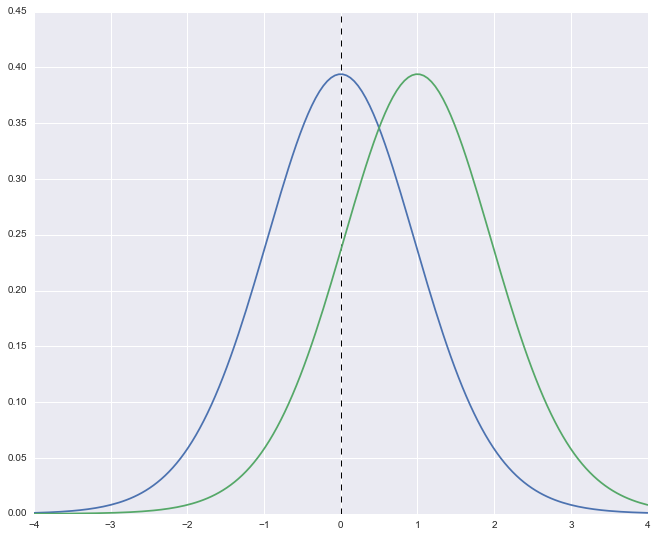

In [152]:
np.random.seed(12)

data1 = np.random.normal(0, 1, size=20) # mean = 0, standard deviation = 1, sample size = 20 
data2 = np.random.normal(1, 1, size=20) # mean = 1, standard deviation = 1, sample size = 20 

true_mu = 0

print stats.ttest_1samp(data1, true_mu)
print stats.ttest_1samp(data2, true_mu)

x = np.linspace(-4, 4, 160)

plt.plot(x, stats.t.pdf(x, 20))
plt.plot(x, stats.t.pdf(x, 20, loc=1))
plt.vlines(0, 0, 0.45, color="k", linestyles="--", lw=1)

The test result shows the t-statistic is equal to 0.148 for the first data set and 2.236 for the second data set. These test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. 

We can determine the boundaries of a 95% confidence interval by calculating the t-statistics associated with the outer quantiles.

In [55]:
print stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

print stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

-2.00957523449
2.00957523449


For the first data set, the t-statistic is within our confidence interval, so we would keep the null hypothesis. In the second data set, the t-statistic is well outside the confidence interval, so we would reject the null hypothesis.

We can calculate the chances of seeing a result as extreme as the one we observed, the p-value, by passing the t-statistic in as the quantile to the stats.t.cdf() function.

In [62]:
print stats.t.cdf(x= -0.148,      # T-test statistic
                  df= 19) * 2   # Mupltiply by two for two tailed test

print stats.t.cdf(x= -2.236,      # T-test statistic
                  df= 19) * 2   # Mupltiply by two for two tailed test

0.883902135012
0.0375457261481


The alternative hypothesis we are checking is whether the sample mean differs from the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

The values here are the same as the p-values listed in the original t-test output. For the first data set, the p-value of 0.884 means we would expect to see data as extreme as our sample due to chance approximately 88.4% of the time if the null hypothesis is true. In this case, the p-value is higher than our significance level $\alpha$ (which is equal to 1-confidence level or 0.05) so we should not reject the null hypothesis. 

In the second data set, the p-value of 0.038 means that this result would occur by chance only 3.8% of the time. This is outside of our 95% confidence interval, so we should reject the null hypothesis.

If we had chosen a more stringent significance level, perhaps $\alpha$=0.01, then the p-value would have been greater than this, and we would have not rejected the null hypothesis.

## Two-Sample T-Test

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. The t statistic to test whether the means are different can be calculated as follows:

$${\displaystyle t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{s_{p}{\sqrt {2/n}}}}}$$
where

$${\displaystyle \ s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}}$$

In [79]:
np.random.seed(12)

data1 = np.random.normal(0, 1, size=20) # mean = 0, standard deviation = 1, sample size = 20 
data2 = np.random.normal(2, 1, size=20) # mean = 1, standard deviation = 1, sample size = 20 

stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=-4.34132182578273, pvalue=0.00010130195088421083)

The test yields a p-value of 0.0001, which means there is a 0.01% chance we would see sample data this far apart if the two groups tested are actually identical. The null hypothesis would be rejected even for a 99% confidence interval.

## Type I and Type II Errors

Type I error describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive". The type I error rate is equal to the significance level α, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

Type II error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative". The higher your confidence level, the more likely you are to make a type II error.

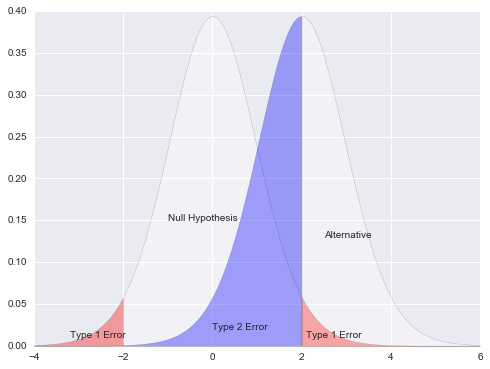

In [154]:
plt.figure(figsize=(8,6))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.t.pdf(np.arange(-4,-2,0.01), 20),
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.t.pdf(np.arange(-2,2,0.01), 20),
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,6,0.01), 
                 y1= stats.t.pdf(np.arange(2,6,0.01), 20),
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.t.pdf(np.arange(-4,-2,0.01), 20, loc=2, scale=1),
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.t.pdf(np.arange(-2,2,0.01), 20, loc=2, scale=1),
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,6,0.01), 
                 y1= stats.t.pdf(np.arange(2,6,0.01), 20, loc=2, scale=1),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-1, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In the plot above, the red areas indicate type I errors occurring when the null is rejected, but the alternative hypothesis is actually not different from the null.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, but the null is not rejected. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level. 

|                     | Observation Positive     | Observation Negative    |
|---------------------|:------------------------:|:-----------------------:|
| Prediction Positive |     True Positive        | False Positive (Type I) |
| Prediction Negative | False Negative (Type II) |     True Negative       |


1. The **Precision** is true positives divided by all positive predictions $$ \frac {TP}{TP + FP} $$
1. The **Recall** is true positives divided by all positive observations $$ \frac {TP}{TP + FN} $$

Absence of type I and type II errors corresponds respectively to maximum precision (no false positive) and maximum recall (no false negative) values of 1. 

High precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

# Bayesian Posterior Inference

## Bayes' Theorem




$$  P(A \, | \, B) \; = \frac {P(B \, | \, A) \; P(A)}{P(B)}  $$ or $$  P(H \, | \, E) \; = \frac {P(E \, | \, H) \; P(H)}{P(E)}  $$

Let *H* represent the hypothesis that it rained today, and *E* represent the evidence that the sidewalk outside is wet: 

$$p(\text{rain}|\text{wet}) = \frac{p(\text{wet | rain})p(\text{rain})}{p(\text{wet})} = \frac{p(\text{wet | rain})p(\text{rain})}{p(\text{wet | rain})p(\text{rain}) + p(\text{wet | no rain})p(\text{no rain})}$$

This procedure is the basis for Bayesian inference. Our initial beliefs are represented by the prior distribution p(rain), and our final beliefs are represented by the posterior distribution p(rain | wet). 

## The Posterior Distribution

After considering evidence, the posterior distribution of *H* gives us plausibility of any rate from 0 to 1.

The effect of the evidence is provided by the likelihood function, p(E|H). What we are ultimately interested in is the plausibility of all proposed values of *H* given our data or our posterior distribution p(H|E).  Our posterior distribution is given by the product of our likelihood function and our prior distribution:

$$ P(H | E) = \frac{P(H) P(E | H)}{P(E)} $$

Since p(E) is a constant, as it does not depend on *H*, we can think of the posterior distribution as:

$$\text{Posterior} = \frac{\text{Prior}\cdot\text{Evidence}}{\text{Constant}}$$

## Conjugate priors

For certain choices of the prior, the posterior has the same algebraic form as the prior (generally with different parameter values). Such a choice is a conjugate prior. A conjugate prior is an algebraic convenience, giving a closed-form expression for the posterior; otherwise numerical integration may be necessary. Further, conjugate priors may give intuition, by more transparently showing how a likelihood function updates a prior distribution.

Consider a random variable which consists of the number of successes s in n Bernoulli trials with unknown probability of success q in [0,1]. This random variable will follow the binomial distribution, with a probability mass function of the form

$$ {\displaystyle p(s)={n \choose s}q^{s}(1-q)^{n-s}} $$
The usual conjugate prior is the beta distribution with parameters $\alpha ,\beta$:

$$ p(q)={q^{\alpha -1}(1-q)^{\beta -1} \over \mathrm {B} (\alpha ,\beta )} $$
where $\alpha ,\beta$ are chosen to reflect existing evidence. Β($\alpha ,\beta$) is the Beta function acting as a normalising constant.

If we then sample this random variable and get s successes and f failures, we have

$$\begin{aligned}P(s,f\mid q=x)&={s+f \choose s}x^{s}(1-x)^{f},\\P(x)&={x^{\alpha -1}(1-x)^{\beta -1} \over \mathrm {B} (\alpha ,\beta )},\\P(q=x\mid s,f)&={\frac {P(s,f\mid x)P(x)}{\int P(s,f\mid x)P(x)dx}}$$\\&={{{(s+f) \choose s}x^{s+\alpha -1}(1-x)^{f+\beta -1}/\mathrm {B} (\alpha ,\beta )} \over \int _{y=0}^{1}\left({s+f \choose s}y^{s+\alpha -1}(1-y)^{f+\beta -1}/\mathrm {B} (\alpha ,\beta )\right)dy}\\&={x^{s+\alpha -1}(1-x)^{f+\beta -1} \over \mathrm {B} (s+\alpha ,f+\beta )},\\\end{aligned}
which is another Beta distribution with parameters ($ \alpha  + s, \beta  + f$). This posterior distribution could then be used as the prior for more samples, with the hyperparameters simply adding each extra piece of information as it comes.

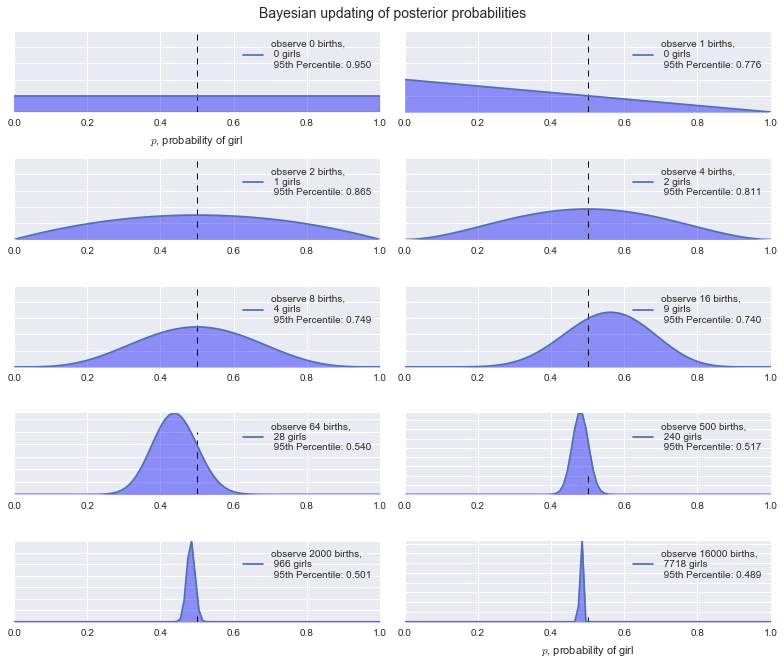

In [141]:
# Code adapted from 'Programming and Bayesian Methods for Hackers'
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)


dist = stats.beta  # Beta function to be used as the conjugate prior of the binomial distribution.
n_trials = [0, 1, 2, 4, 8, 16, 64, 500, 2000, 16000]  # See the effect of the number of births on the updating of the posterior distribution.
data = stats.bernoulli.rvs(0.485, size=n_trials[-1], random_state=12)  # Bernoulli trials to generate births
x = np.linspace(0, 1, 100)


for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of girl") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    girls = data[:N].sum()  # Number of girls born
    y = dist.pdf(x, 1 + girls, 1 + N - girls)  # Beta distribution using number of girls and boys born as hyperparameters.
    percentile = dist.ppf(0.95, 1 + girls, 1 + N - girls)  # 95th percentile of distribution
    plt.plot(x, y, label="observe %d births,\n %d girls \n 95th Percentile: %.3f" % (N, girls, percentile))
    plt.fill_between(x, 0, y, color="b", alpha=0.4)
    plt.vlines(0.5, 0, 5, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

The posterior probabilities are represented by the curves, and the uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more births, our probabilities will tighten around the true value of p=0.485.

Analysis using a uniform prior distribution. Under a uniform prior distribution for the probability of a girl birth, the posterior distribution is Beta(438, 544). Exact summaries of the posterior distribution can be obtained from the properties of the beta distribution. Exact posterior quantiles can be obtained using numerical integration of the beta density.

In many situations it is not feasible to perform calculations on the posterior density function directly. In such cases it can be particularly useful to perform a simulation of the posterior distribution to obtain inferences. The eighth plot shows the distribution of 100 draws from the Beta(241, 261) posterior distribution. An estimate of the 95% posterior percentile, obtained by taking the 95th of the 100 ordered draws, is 0.517. With this amount of data, we would not yet be able to reject the null hypothesis that boys and girls are each born 50% of the time using a significance level of 0.05. For the tenth plot, the 95% percentile is at 0.489, so we would be able to reject the null hypothesis and be more than 95% certain that more boys are born than girls.